In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_list = []

clientes = ['CLIENTE1', 'CLIENTE2', 'CLIENTE3', 'CLIENTE4', 'CLIENTE5', 'CLIENTE6', 'CLIENTE7', 'CLIENTE8', 'CLIENTE9', 'CLIENTE10', 
            'CLIENTE11', 'CLIENTE12', 'CLIENTE13', 'CLIENTE14', 'CLIENTE15', 'CLIENTE16', 'CLIENTE17', 'CLIENTE18', 'CLIENTE19', 'CLIENTE20']
total=[]
for cliente in clientes:
    df = pd.read_excel("Datos.xlsx", sheet_name=cliente)    
    df['Cliente'] = cliente
    total.append((cliente, df.shape[0]))
    data_list.append(df)

data = pd.concat(data_list, ignore_index=True)
data.head()

,Fecha,Presion,Temperatura,Volumen,Cliente
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1


In [12]:
cliente_minimo=min(total, key=lambda x: x[1])
cliente_maximo=max(total, key=lambda x: x[1])
print(f"Total de registros: {data.shape[0]}")
print(f"Cliente con el menor número de registros: {cliente_minimo[0]}, {cliente_minimo[1]} registros")
print(f"Cliente con el mayor número de registros: {cliente_maximo[0]}, {cliente_maximo[1]} registros")

Total de registros: 847946
Cliente con el menor número de registros: CLIENTE10, 41059 registros
Cliente con el mayor número de registros: CLIENTE5, 43415 registros


In [13]:
#Datos nulos
data.isnull().sum()

Fecha          0
Presion        0
Temperatura    0
Volumen        0
Cliente        0
dtype: int64

In [14]:
#Tipo de datos
print(data.dtypes)
print(f"Fecha inicial de los datos: {min(data['Fecha'])}")
print(f"Fecha final de los datos: {max(data['Fecha'])}")

print(f"Presión mínima reportada: {min(data['Presion'])}")
print(f"Presión máxima reportada: {max(data['Presion'])}")
print(f"Volumen mínimo reportado: {min(data['Volumen'])}")
print(f"Volumen máximo reportado: {max(data['Volumen'])}")
print(f"Temperatura mínima reportada: {min(data['Temperatura'])}")
print(f"Temperatura máxima reportada: {max(data['Temperatura'])}")      
print(f"Total de valores menores a 0 en Temperatura: {(data['Temperatura'] < 0).sum()}")

Fecha          datetime64[ns]
Presion               float64
Temperatura           float64
Volumen               float64
Cliente                object
dtype: object
Fecha inicial de los datos: 2019-01-14 00:00:00
Fecha final de los datos: 2023-12-31 23:00:00
Presión mínima reportada: 2.934872944079337
Presión máxima reportada: 20.3078517520416
Volumen mínimo reportado: 0.0
Volumen máximo reportado: 577.413424840352
Temperatura mínima reportada: -5.257899119133391
Temperatura máxima reportada: 50.0198525499051
Total de valores menores a 0 en Temperatura: 2


In [15]:
print("Fechas duplicadas por cliente y sus cantidades")
for i in clientes:
    x = data["Fecha"][data["Cliente"] == i]
    fechas_duplicadas = x[x.duplicated(keep=False)]
    if not fechas_duplicadas.empty:
        print(f"Cliente: {i} total: {fechas_duplicadas.shape[0]} \n {fechas_duplicadas.value_counts()}")
    indices_duplicados = data[data["Cliente"] == i].duplicated(subset='Fecha', keep='first')
    data = data[~((data["Cliente"] == i) & indices_duplicados)]

Fechas duplicadas por cliente y sus cantidades


In [19]:
#Estaditicas descriptivas
print("Cliente 1 \n",data[data["Cliente"] == "CLIENTE12"].describe())
clientes_descripcion = data.groupby("Cliente").describe()
clientes_descripcion
data.describe()

Cliente 1 
             Presion   Temperatura       Volumen
count  41776.000000  41776.000000  41776.000000
mean      17.833667     26.689551     33.731496
std        0.418490      4.998354     41.952033
min       13.740922     -5.257899      0.000000
25%       17.538897     22.217786      0.000000
50%       17.834866     27.049023      0.000000
75%       18.106159     31.144009     77.654802
max       20.232110     50.019853    284.475087


,Presion,Temperatura,Volumen
count,847946.000000,847946.000000,847946.000000
mean,16.072967,25.198209,62.327764
std,4.186395,3.790516,80.498365
min,2.934873,-5.257899,0.000000
25%,17.097354,22.692978,0.000000
50%,17.570446,25.379804,21.772860
75%,17.694256,27.886246,99.319087
max,20.307852,50.019853,577.413425


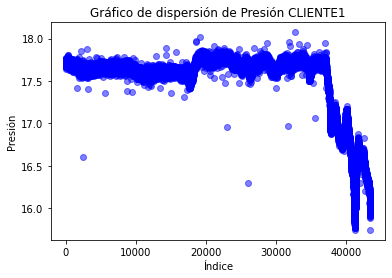

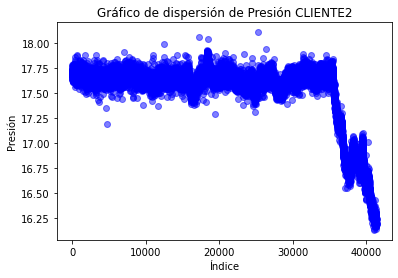

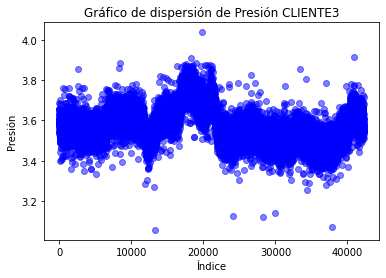

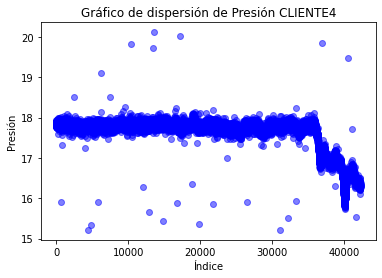

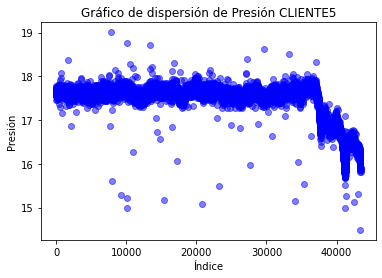

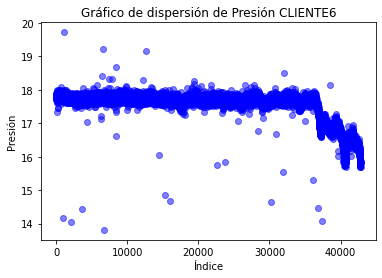

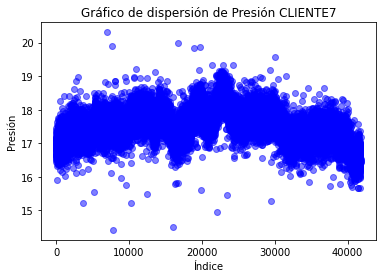

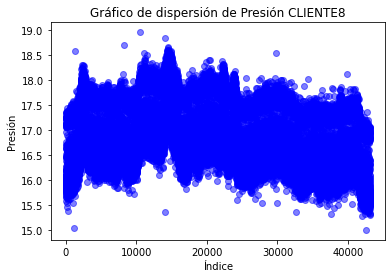

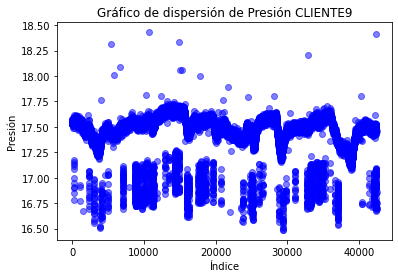

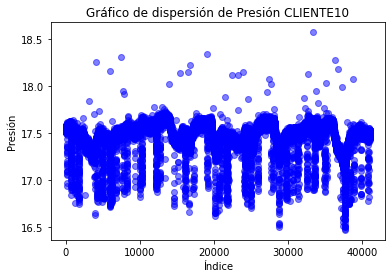

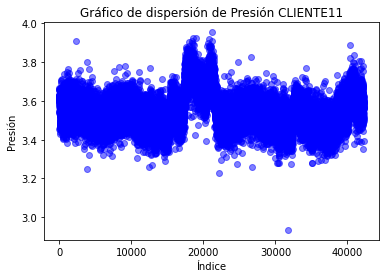

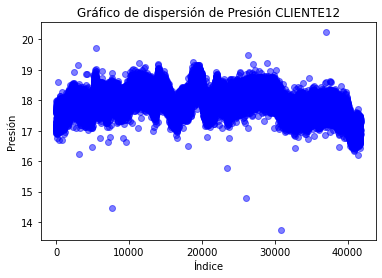

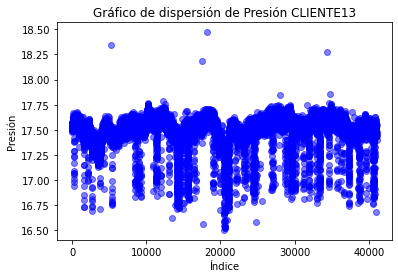

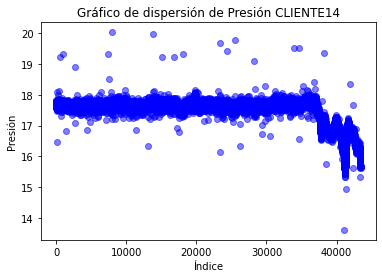

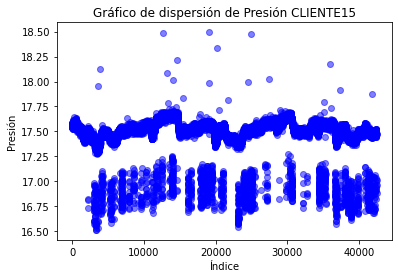

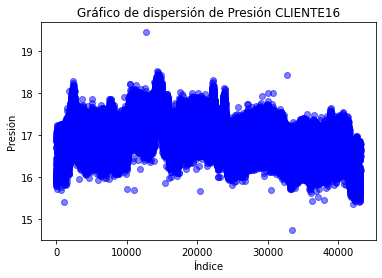

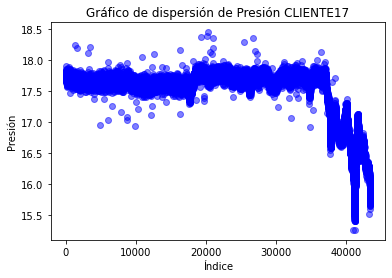

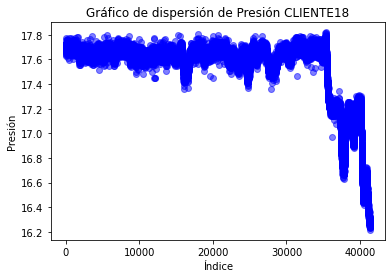

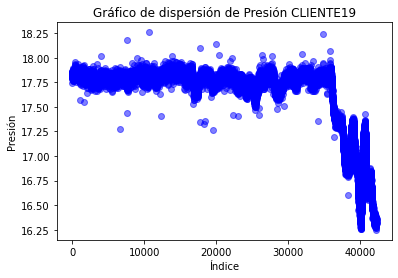

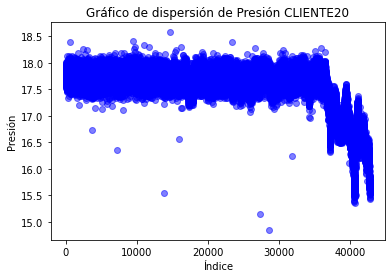

In [11]:
#Graficas para identificar outliers en variable Presión
for i in clientes:
    x=data["Presion"][data["Cliente"] == i]
    plt.scatter(range(len(x)), x, color='blue', alpha=0.5)    
    plt.title(f'Gráfico de dispersión de Presión {i}')
    plt.xlabel('Índice')
    plt.ylabel('Presión')
    plt.show()

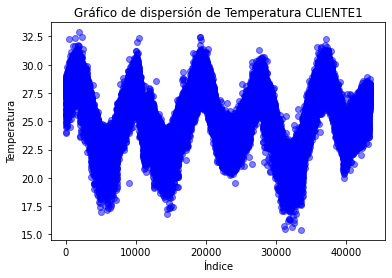

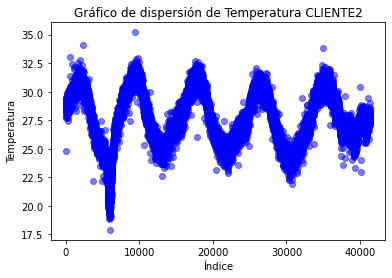

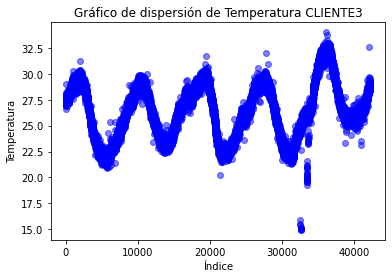

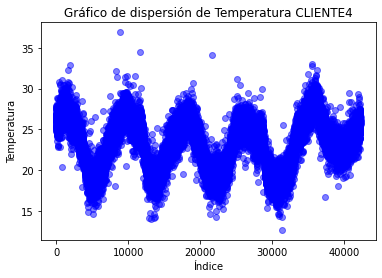

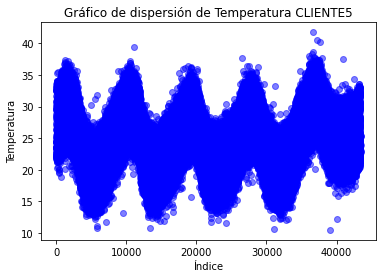

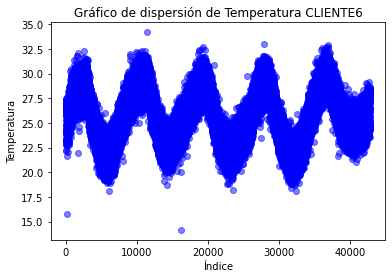

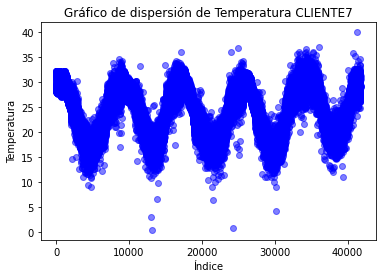

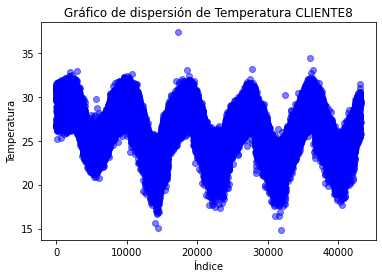

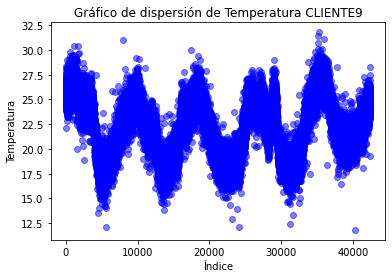

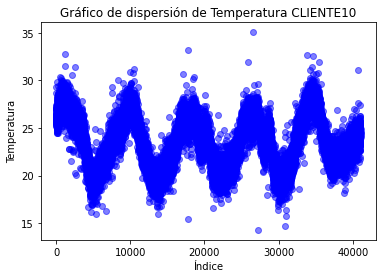

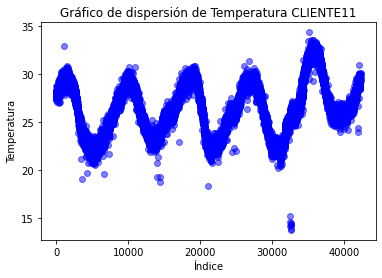

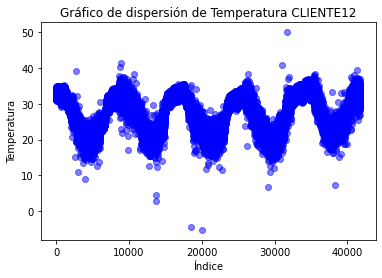

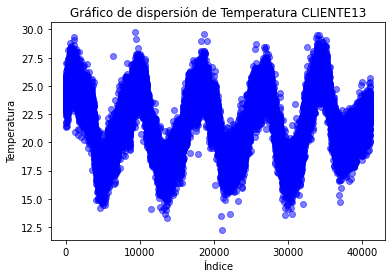

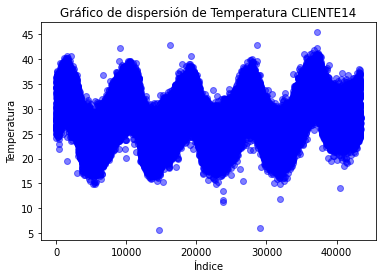

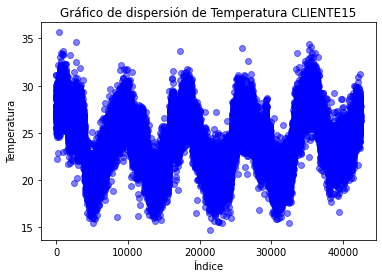

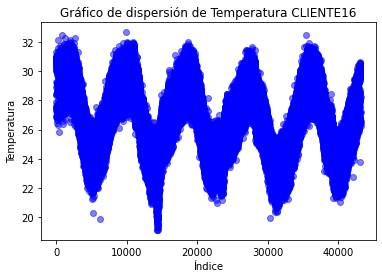

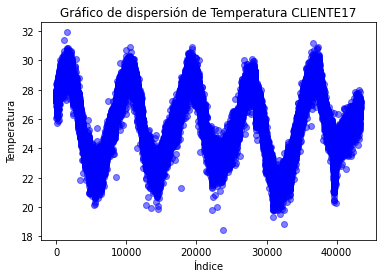

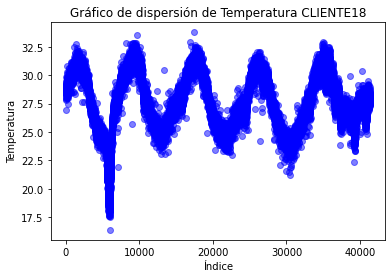

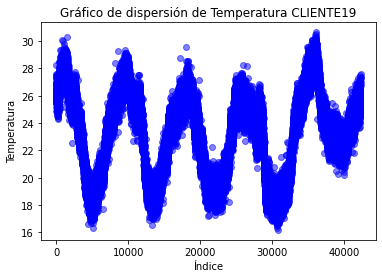

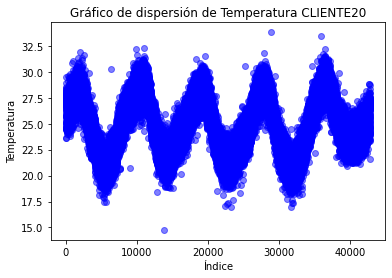

In [17]:
#Graficas para identificar outliers en variable Temperatura
for i in clientes:
    x=data["Temperatura"][data["Cliente"] == i]
    plt.scatter(range(len(x)), x, color='blue', alpha=0.5)
    plt.title(f'Gráfico de dispersión de Temperatura {i}')
    plt.xlabel('Índice')
    plt.ylabel('Temperatura')
    plt.show()

In [ ]:
#Graficas para identificar outliers en variable Temperatura
for i in clientes:
    x=data["Temperatura"][data["Cliente"] == i]
    plt.scatter(range(len(x)), x, color='blue', alpha=0.5)
    plt.title(f'Gráfico de dispersión de Temperatura {i}')
    plt.xlabel('Índice')
    plt.ylabel('Temperatura')
    plt.show()

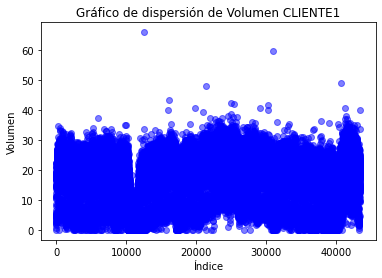

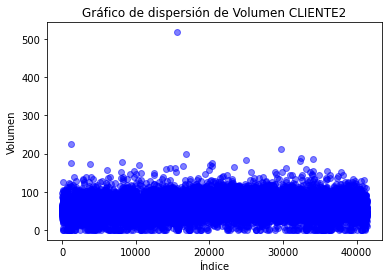

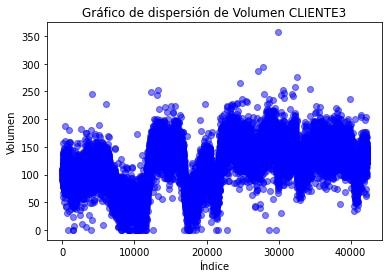

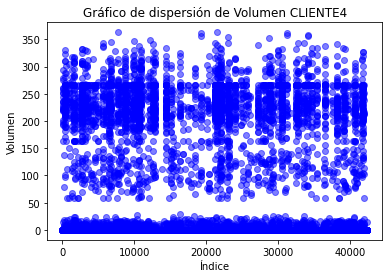

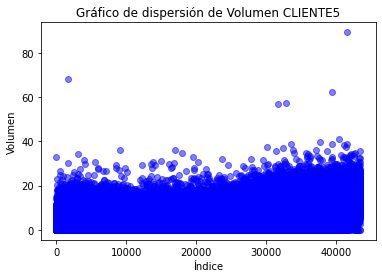

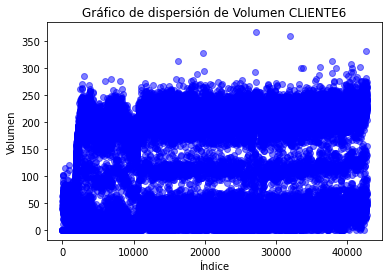

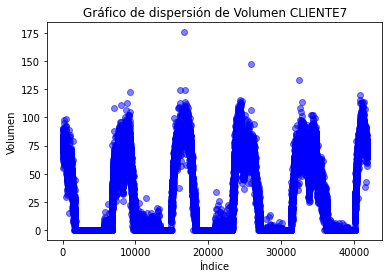

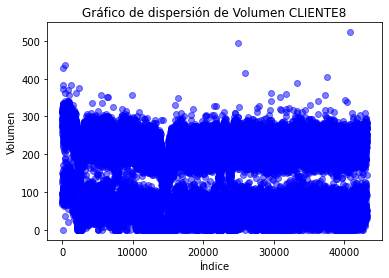

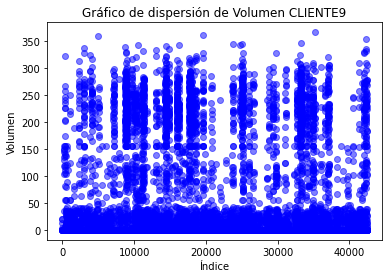

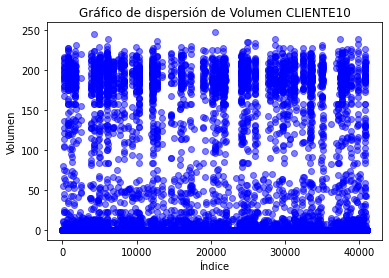

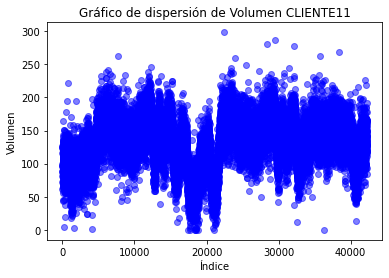

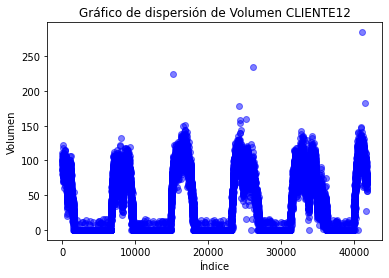

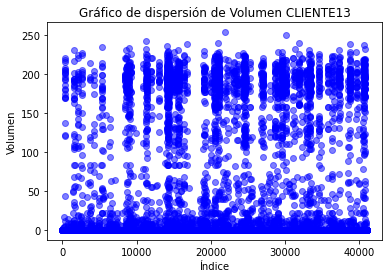

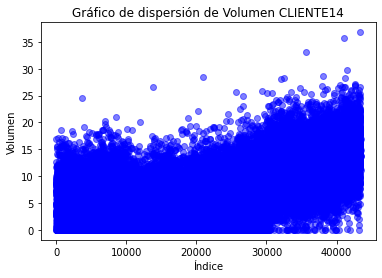

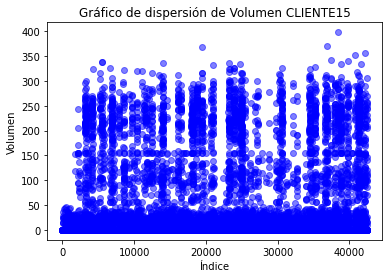

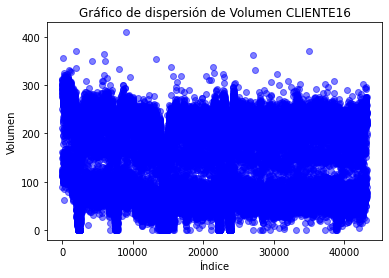

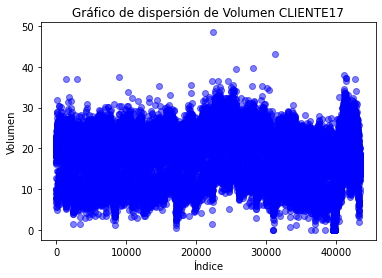

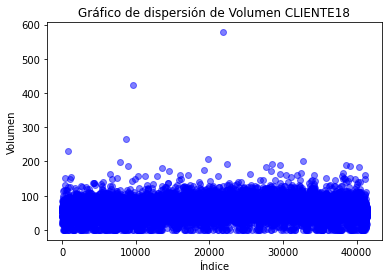

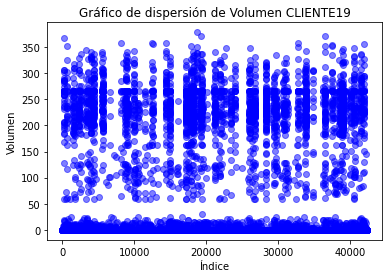

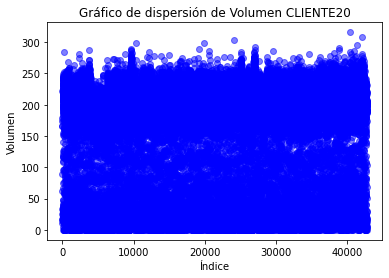

In [28]:
#Graficas para identificar outliers en variable Volumen
for i in clientes:
    x=data["Volumen"][data["Cliente"] == i]
    plt.scatter(range(len(x)), x, color='blue', alpha=0.5)
    plt.title(f'Gráfico de dispersión de Volumen {i}')
    plt.xlabel('Índice')
    plt.ylabel('Volumen')
    plt.show()

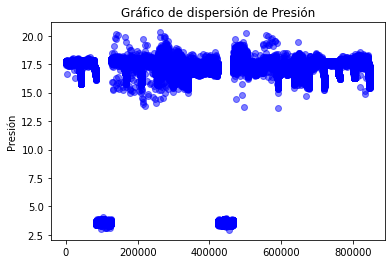

In [23]:
x=data["Presion"]
plt.scatter(range(len(x)), x, color='blue', alpha=0.5)
plt.title(f'Gráfico de dispersión de Presión')
#plt.xlabel('Índice')
plt.ylabel('Presión')
plt.show()